In [1]:
!python -m spacy download en_core_web_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [2]:
import spacy
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import en_core_web_lg

In [3]:
nlp = spacy.load('en_core_web_lg')

In [4]:
#Read in the scrape results
rgames = pd.read_csv('/content/rxboxone_comments.csv')#,sep = '\t')
rgames[:5]

,submission,author,body,score,created,url_of_post
0,e9xirg,therealtinnyhippo,"Some extra info, courtesy of this official Mic...",2348,1.576209e+09,/r/xboxone/comments/e9xirg/xbox_series_x_world...
1,e9xirg,IndieAdmirer,[The state of this sub come Holiday 2020. ](ht...,3439,1.576205e+09,/r/xboxone/comments/e9xirg/xbox_series_x_world...
2,e9xirg,NaN,At the very least it looks like it's going to ...,3805,1.576204e+09,/r/xboxone/comments/e9xirg/xbox_series_x_world...
3,e9xirg,shugo2000,Did *not* see that coming tonight!!,3046,1.576203e+09,/r/xboxone/comments/e9xirg/xbox_series_x_world...
4,e9xirg,DrNick1221,Holy crap thats a lot more.... vertical than I...,3964,1.576203e+09,/r/xboxone/comments/e9xirg/xbox_series_x_world...


###Attribute frequency to determine top five

In [5]:
import nltk
import re
nltk.download('stopwords')
#We need to filter out stopwords
from nltk.corpus import stopwords
#Use nltk's stopwords list
stopwords_list = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
#clean_comment accepts a string. It then cleans the comment by removing punctuation and stopwords.
#It returns a list of words in that string.
def clean_comment(comment):
    #For cleaning up the test comment. Remove punctuation and make everything lower case.
    comment = re.sub(r'[^\w\s]','',comment.lower())
    
    #Syntax translation:
    #word can be anything. I choose word since it's what we're essentially doing
    #comment.split() converts the comment into a list. 
    #Then see if the word in that list is in the drop_stop or not. 
    #Drops any word that is in the stopwords list.
    stopwords_list = stopwords.words('english')
    #Store this list and return it.
    cleaned = [word for word in comment.split() if word not in stopwords_list]
    return cleaned

In [7]:
#Use function to create a new cleaned comment column.
rgames['cleaned comment'] = rgames['body'].astype(str).apply(clean_comment)

In [8]:
#Accepts a list of words as a parameter.
#Counts word occurrences and stores it as a dictionary which is returned.
def create_word_count(word_list):
    #Create dictionary that acts as the values for the main frame.
    word_frequency={}

    for word in word_list: #Take each word in the words list.
        if word in word_frequency: #If I have seen this word, update number of times seen by 1
            word_frequency[word] +=1
        else: #I have not seen this word yet. Put it in as a key value.
            word_frequency[word]  = 1
    return word_frequency

In [9]:
#Create a new column that contains the word frequency dictionaries
rgames['count dictionary'] = rgames['cleaned comment'].map(create_word_count)

In [10]:
#Create a list of attributes that we think belong 
attribute_list = ['performance','graphics','affordable','favorite','buy','speed',
                 'price','security','fps','games','multiplayer','online','subscription',
                  'quality', 'best']
#Feel free to append or add more to the list
#attribute_list.append('Phrase here')

In [11]:
attribute_df = pd.DataFrame(index = attribute_list)

In [12]:
attribute_df['frequency'] = 0

In [13]:
#Count the number of times a brand has been mentioned in a message/comment throughout the entire df
for dictionary in rgames['count dictionary']: #Take each dictionary
    for key,value in dictionary.items(): #For each key (word) and value (frequency)
        if key in attribute_list: #The key matches a word in the attribute list.
            #Add 1 to the value of the word it matched in the dataframe.
            attribute_df.loc[key] += 1

In [14]:
attribute_df.sort_values(by='frequency',ascending=False)[:5]

,frequency
games,227
buy,62
price,44
best,39
performance,18


###General Word frequency analysis

In [15]:
#Import everything.
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from sklearn import manifold
from matplotlib.font_manager import FontProperties
import re

import nltk
from nltk import FreqDist
from nltk.corpus import stopwords # Import the stop word list
from nltk.tokenize import sent_tokenize, word_tokenize

from collections import Counter
from itertools import chain

In [16]:
#create a new data frame for beers. Clean up the reviews even more for word tokenization.
rgames2 = rgames[['author','body']].copy()

In [17]:
#Replace punctuation with blanks. 
rgames2['new_cleaned_review'] = rgames2['body'].str.replace(r'[^\w\s]+', '')

In [18]:
#Convert to lower case
rgames2['new_cleaned_review'] = rgames2['new_cleaned_review'].str.lower()

In [19]:
stopwords_list = stopwords.words('english')

#Function to get the word tokens
def get_tokens(entry):
    #Use nltk to get word tokens.
    tokens = word_tokenize(entry)
    
    #Tokenize the word here. Returns the word if the word is a string. .isalpha() is a method that does this.
    token_words = [w for w in tokens if w.isalpha()]
    
    return token_words

#Function to remove the stopwords
def remove_stop_words(entry):
    
    no_stopwords = [w for w in entry if not w in stopwords_list]
    return (no_stopwords)


#Function to delist the entries and join the words together in a string.
def rejoin_words(entry):
    
    joined_words = ( " ".join(entry))
    return joined_words



In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
#Apply functions
#Word tokenization first
rgames2['words'] = rgames2['new_cleaned_review'].apply(get_tokens)

#Remove stopwords next
rgames2['words'] = rgames2['words'].apply(remove_stop_words)

#Rejoin list to a sentence.
rgames2['processed_review'] = rgames2['words'].apply(rejoin_words)

#Iterate through the sentences.

#Use the Counter function from the collections module to count words.
#Use chain from itertools module to iterate.
tally = Counter(chain.from_iterable(map(str.split, rgames2['processed_review'].tolist()))) 

#Create a series for the word counts.
series = pd.Series(tally).sort_values(ascending=False)

#Create a term frequency dataframe for the words and their frequency
term_freq = series.reset_index()
term_freq.columns = ['words','freq']


#Top ten most mentioned words
term_freq.head(10)

,words,freq
0,xbox,496
1,games,383
2,one,324
3,game,297
4,x,255
5,series,249
6,like,243
7,im,192
8,console,167
9,new,164


Nothing useful

#Sentiment Analysis

###cosine similarity

In [22]:
#Use function to create a new cleaned body column.
rgames['cleaned body'] = rgames['body'].astype(str).apply(clean_comment)

In [23]:
attributes = ['games','buy','price', 'best','performance']

In [24]:
attributes_nlp = nlp('games, buy, price, best, performance')
def get_similarity(review_words):
    text_review = ' '.join(review_words)
    review_nlp = nlp(text_review)
    return review_nlp.similarity(attributes_nlp)

rgames['similarity'] =  rgames['cleaned body'].apply(get_similarity)

/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  "__mai

In [25]:
similarity = rgames.groupby('author')['similarity'].mean().reset_index().sort_values(by='similarity',ascending = False)
similarity['similarity'].mean()

0.5468895777129007

###Sentiment analysis using vader

In [26]:
pip install VADER

In [27]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [28]:
from nltk.tokenize import sent_tokenize


In [29]:
#Create dataframe with original reviews
sent_games = rgames[['author','body']].copy()
#Add in columns to store sentiment for the attributes
sent_games['games_sentiment'] = 0
sent_games['buy_sentiment'] = 0
sent_games['price_sentiment'] = 0
sent_games['quality_sentiment'] = 0
sent_games['graphics_sentiment'] = 0


In [30]:
sent_games.head()

,author,body,games_sentiment,buy_sentiment,price_sentiment,quality_sentiment,graphics_sentiment
0,therealtinnyhippo,"Some extra info, courtesy of this official Mic...",0,0,0,0,0
1,IndieAdmirer,[The state of this sub come Holiday 2020. ](ht...,0,0,0,0,0
2,NaN,At the very least it looks like it's going to ...,0,0,0,0,0
3,shugo2000,Did *not* see that coming tonight!!,0,0,0,0,0
4,DrNick1221,Holy crap thats a lot more.... vertical than I...,0,0,0,0,0


In [31]:
nltk.download('vader_lexicon')
vader = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [32]:
#Iterrate through the dataframe
for i in sent_games.index:
    #Get a review and split it into sentence tokens
    review = sent_games.loc[i,'body']
    review = sent_tokenize(review)
    
    #Store score values here
    #Resets every time loop runs. This is intentional.
    comp_games = []
    comp_buy = []
    comp_price = []
    comp_quality = []
    comp_graphics = []
    
    #Iterate through the sentence tokens. Get compound sentiment score if the word is present.
    for sent_token in review:
        if 'games' in sent_token.lower():
            games_score = vader.polarity_scores(sent_token).get('compound')
            comp_games.append(games_score)
            
        if 'buy' in sent_token.lower():
            buy_score = vader.polarity_scores(sent_token).get('compound')
            comp_buy.append(buy_score)
            
        if 'price' in sent_token.lower():
            price_score = vader.polarity_scores(sent_token).get('compound')
            comp_price.append(price_score)
        if 'quality' in sent_token.lower():
            quality_score = vader.polarity_scores(sent_token).get('compound')
            comp_quality.append(quality_score)
        if 'graphics' in sent_token.lower():
            graphics_score = vader.polarity_scores(sent_token).get('compound')
            comp_graphics.append(graphics_score)
    
    #Store each sentiment score in the array
    if len(comp_games) == 0: #Nothing is in the list. No sentiment for the review.
        sent_games.loc[i,'games_sentiment'] = None
    else: #Balanced is in the review. Take the average of the list and store it.
        #Taking average means to convert it into a numpy array and then using the np.mean
        sent_games.loc[i,'games_sentiment'] = np.mean(np.array(comp_games))
    
    #Repeat conditions for attributes.
    if len(comp_buy) == 0:
        sent_games.loc[i,'buy_sentiment'] = None
    else:
        sent_games.loc[i,'buy_sentiment'] = np.mean(np.array(comp_buy))
    if len(comp_price) == 0:
        sent_games.loc[i,'price_sentiment'] = None
    else:
        sent_games.loc[i,'price_sentiment'] = np.mean(np.array(comp_price))
    if len(comp_quality) == 0:
        sent_games.loc[i,'quality_sentiment'] = None
    else:
        sent_games.loc[i,'quality_sentiment'] = np.mean(np.array(comp_quality))
    if len(comp_graphics) == 0:
        sent_games.loc[i,'graphics_sentiment'] = None
    else:
        sent_games.loc[i,'graphics_sentiment'] = np.mean(np.array(comp_graphics))

In [33]:
#Group all the sentiments of the review together
avg_sent_games = sent_games.groupby(by=["author"])[["games_sentiment", "buy_sentiment", "price_sentiment","quality_sentiment","graphics_sentiment"]].mean()

In [34]:
#Sentiments that are not present are treated as Zero. 
#Want to pinpoint comments based on attributes.
#Mean is simply adding five columns together and dividng by 5
avg_sent_games['average_sentiment'] = (avg_sent_games['games_sentiment'].fillna(0)+avg_sent_games['buy_sentiment'].fillna(0)
 +avg_sent_games['price_sentiment'].fillna(0)+avg_sent_games['quality_sentiment'].fillna(0)+avg_sent_games['graphics_sentiment'].fillna(0))/5

In [35]:
avg_sent_games.sort_values(by='average_sentiment', ascending = False).fillna(0)

,games_sentiment,buy_sentiment,price_sentiment,quality_sentiment,graphics_sentiment,average_sentiment
author,,,,,,
ZeroDwayne,0.799200,0.799200,0.79920,0.0000,0.0000,0.479520
Cirias,0.840200,0.840200,0.00000,0.0000,0.0000,0.336080
mykkenny,0.871400,0.484633,0.09010,0.0000,0.0000,0.289227
MankyBaws88,0.335514,0.149167,0.00000,0.9136,0.0000,0.279656
WyrmHero1944,0.000000,0.670500,0.67050,0.0000,0.0000,0.268200
...,...,...,...,...,...,...
Eddielowfilthslayer,-0.659700,0.000000,0.00000,0.0000,0.0000,-0.131940
ichinii,0.000000,0.000000,0.00000,0.0000,-0.7096,-0.141920
dr_strangelove42,0.000000,0.000000,-0.73385,0.0000,0.0000,-0.146770


In [36]:
avg_sent_games = avg_sent_games.apply('mean')
avg_sent_games

games_sentiment       0.223397
buy_sentiment         0.191704
price_sentiment       0.143538
quality_sentiment     0.258554
graphics_sentiment    0.029075
average_sentiment     0.010233
dtype: float64

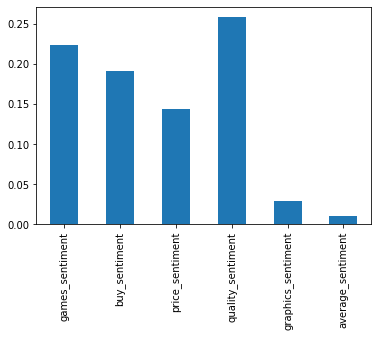

In [46]:
avg_sent_games.plot(kind='bar')